In [128]:
import networkx as nx
import nltk
nltk.download('wordnet')
nltk.download('omw')
from nltk.corpus import wordnet as wn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from networkx.algorithms import community
import json

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Mi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw to
[nltk_data]     C:\Users\Mi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw is already up-to-date!


In [131]:
 len(wn.langs())

29

In [3]:
females = []
males = []
for synset in wn.all_synsets('n'):
    if 'female' in synset.name():
        print(synset.name(), synset.definition())
        take = str(input('Take synset? y/n'))
        if take == 'y':
            females.append(synset)
    elif 'male' in synset.name():
        print(synset.name(), synset.definition())
        take = str(input('Take synset? y/n'))
        if take == 'y':
            males.append(synset)

male_orgasm.n.01 an orgasm accompanied by the sensation of ejaculation of semen
Take synset? y/ny
male_chauvinism.n.01 activity indicative of belief in the superiority of men over women
Take synset? y/ny
female.n.01 an animal that produces gametes (ova) that can be fertilized by male gametes (spermatozoa)
Take synset? y/ny
male.n.01 an animal that produces gametes (spermatozoa) that can fertilize female gametes (ova)
Take synset? y/ny
maleo.n.01 Celebes megapode that lays eggs in holes in sandy beaches
Take synset? y/ny
female_mammal.n.01 animals that nourish their young with milk
Take synset? y/ny
male_horse.n.01 the male of species Equus caballus
Take synset? y/ny
brompheniramine_maleate.n.01 antihistamine (trade name Dimetane) used to treat hypersensitivity reactions (as rhinitis)
Take synset? y/nn
chlorpheniramine_maleate.n.01 an antihistamine (trade names Coricidin and Chlor-Trimeton)
Take synset? y/nn
malevolence.n.02 the quality of threatening evil
Take synset? y/nn
maleficence.

In [4]:
females

[Synset('female.n.01'),
 Synset('female_mammal.n.01'),
 Synset('femaleness.n.01'),
 Synset('female_body.n.01'),
 Synset('adult_female_body.n.01'),
 Synset('female_reproductive_system.n.01'),
 Synset('female_genitalia.n.01'),
 Synset('female_internal_reproductive_organ.n.01'),
 Synset('female_chest.n.01'),
 Synset('female.n.02'),
 Synset('female_aristocrat.n.01'),
 Synset('female_offspring.n.01'),
 Synset('female_sibling.n.01'),
 Synset('female_child.n.01'),
 Synset('female_bonding.n.01')]

In [5]:
males

[Synset('male_orgasm.n.01'),
 Synset('male_chauvinism.n.01'),
 Synset('male.n.01'),
 Synset('maleo.n.01'),
 Synset('male_horse.n.01'),
 Synset('maleness.n.01'),
 Synset('male_body.n.01'),
 Synset('adult_male_body.n.01'),
 Synset('male_reproductive_system.n.01'),
 Synset('male_genitalia.n.01'),
 Synset('male_internal_reproductive_organ.n.01'),
 Synset('male_reproductive_gland.n.01'),
 Synset('male_chest.n.01'),
 Synset('male.n.02'),
 Synset('male_chauvinist.n.01'),
 Synset('male_aristocrat.n.01'),
 Synset('male_child.n.01'),
 Synset('male_offspring.n.01'),
 Synset('male_sibling.n.01'),
 Synset('male_orchis.n.01'),
 Synset('male_fern.n.01'),
 Synset('mountain_male_fern.n.01'),
 Synset('male_bonding.n.01'),
 Synset('male_hypogonadism.n.01'),
 Synset('male-patterned_baldness.n.01')]

In [6]:
synsets_female = []
for synset in females:
    if synset not in synsets_female:
        synsets_female.append(synset)
    print(synset.name(), synset.definition())
    for hyponym in synset.hyponyms():
        if hyponym not in synsets_female:
            synsets_female.append(hyponym)
        print('\t', hyponym.name(), hyponym.definition())
        for hyponym2 in hyponym.hyponyms():
            if hyponym2.name() != 'boy_scout.n.01':
                if hyponym2 not in synsets_female:
                    synsets_female.append(hyponym2)
                print('\t\t', hyponym2.name(), hyponym2.definition())
                for hyponym3 in hyponym2.hyponyms():
                    if hyponym3 not in synsets_female:
                        synsets_female.append(hyponym3)
                    print('\t\t\t', hyponym3.name(), hyponym3.definition())

female.n.01 an animal that produces gametes (ova) that can be fertilized by male gametes (spermatozoa)
	 dam.n.03 female parent of an animal especially domestic livestock
	 female_mammal.n.01 animals that nourish their young with milk
	 filly.n.01 a young female horse under the age of four
	 hen.n.04 female of certain aquatic animals e.g. octopus or lobster
female_mammal.n.01 animals that nourish their young with milk
femaleness.n.01 the properties characteristic of the female sex
female_body.n.01 the body of a female human being
	 adult_female_body.n.01 the body of an adult woman
adult_female_body.n.01 the body of an adult woman
female_reproductive_system.n.01 the reproductive system of females
female_genitalia.n.01 external female sex organs
	 cunt.n.02 obscene terms for female genitals
	 minge.n.01 vulgar term for a woman's pubic hair or genitals
	 vulva.n.01 external parts of the female genitalia
female_internal_reproductive_organ.n.01 the reproductive organs of a woman
	 fallopian

In [151]:
synsets_male = []
for synset in males:
    if synset not in synsets_male:
        synsets_male.append(synset)
    print(synset.name(), synset.definition())
    for hyponym in synset.hyponyms():
        if hyponym not in synsets_male:
            synsets_male.append(hyponym)
        print('\t', hyponym.name(), hyponym.definition())
        for hyponym2 in hyponym.hyponyms():
            if hyponym2.name() != 'girl_scout.n.01':
                if hyponym2 not in synsets_male:
                    synsets_male.append(hyponym2)
                print('\t\t', hyponym2.name(), hyponym2.definition())
                for hyponym3 in hyponym2.hyponyms():
                    if hyponym3.name() != 'viscountess.n.02':
                        if hyponym3 not in synsets_male:
                            synsets_male.append(hyponym3)
                        print('\t\t\t', hyponym3.name(), hyponym3.definition())

male_orgasm.n.01 an orgasm accompanied by the sensation of ejaculation of semen
male_chauvinism.n.01 activity indicative of belief in the superiority of men over women
male.n.01 an animal that produces gametes (spermatozoa) that can fertilize female gametes (ova)
	 bullock.n.02 castrated bull
	 colt.n.01 a young male horse under the age of four
		 ridgeling.n.01 a colt with undescended testicles
	 male_horse.n.01 the male of species Equus caballus
		 gelding.n.01 castrated male horse
		 stallion.n.01 uncastrated adult male horse
			 stud.n.04 adult male horse kept for breeding
	 sire.n.03 male parent of an animal especially a domestic animal such as a horse
maleo.n.01 Celebes megapode that lays eggs in holes in sandy beaches
male_horse.n.01 the male of species Equus caballus
	 gelding.n.01 castrated male horse
	 stallion.n.01 uncastrated adult male horse
		 stud.n.04 adult male horse kept for breeding
maleness.n.01 the properties characteristic of the male sex
	 virility.n.01 the mascu

In [184]:
with open("wordnet_synsets_male.txt", 'w') as f:
    for hyp in synsets_male:
        f.write(hyp.name() + "\n")

In [185]:
with open("wordnet_synsets_female.txt", 'w') as f:
    for hyp in synsets_female:
        f.write(hyp.name() + "\n")

In [152]:
lemmas_f = set()
for k,v in synsets_male_lemmas.items():
    for lang, lemmas in v.items():
        lemmas_f.update(lemmas)
len(lemmas_f)

2165

In [155]:
synsets_female_lemmas = {}
for synset in synsets_female:
    synsets_female_lemmas[synset] = {}
    for lang in wn.langs(): 
        lemmas = synset.lemma_names(lang)
        if lemmas:
            synsets_female_lemmas[synset][lang] = lemmas
        
synsets_male_lemmas = {}
for synset in synsets_male:
    synsets_male_lemmas[synset] = {}
    for lang in wn.langs():
        lemmas = synset.lemma_names(lang)
        if lemmas:
            synsets_male_lemmas[synset][lang] = lemmas
        
synsets_colexified = []

for i, synset_f in enumerate(synsets_female):
    for j, synset_m in enumerate(synsets_male):
        if synset_f != synset_m:
            langs = {}
            match = False
            for lang in synsets_male_lemmas[synset_m]:
                if lang in synsets_female_lemmas[synset_f]:
                    f_set = set(synsets_female_lemmas[synset_f][lang])
                    m_set = set(synsets_male_lemmas[synset_m][lang])
                    
                    colexified_lemmas = m_set & f_set
                    
                    if len(colexified_lemmas) > 0:
                        match = True
                        if lang not in langs:
                            langs[lang] = []
                        langs[lang].extend(colexified_lemmas)
            if match:
                synsets_colexified.append({'synset_f':synset_f, 'synset_m':synset_m, 'colexified_lemmas':langs})

In [156]:
colexified_m = []
colexified_f = []
female_nodes = []
for pair in synsets_colexified:
    if pair['synset_f'].name() not in female_nodes:
        female_nodes.append(pair['synset_f'].name())
    if pair['synset_f'] not in colexified_f:
        colexified_f.append(pair['synset_f'])
    if pair['synset_m'] not in colexified_m:
        colexified_m.append(pair['synset_m'])
colexified_set = colexified_f + colexified_m

In [157]:
synsets_matrix = np.zeros((len(colexified_set),len(colexified_set)))
langs_att = {}
for i, synset1 in enumerate(colexified_set):
    j = i + 1
    for synset2 in colexified_set[j:]:
        if j < len(colexified_set):
            for pair in synsets_colexified:
                if (synset1 == pair['synset_f'] and synset2 == pair['synset_m']) or (synset1 == pair['synset_m'] and synset2 == pair['synset_f']):
                    langs_att[(pair['synset_f'].name(),pair['synset_m'].name())] = '        '.join(list(pair['colexified_lemmas'].keys()))
                    synsets_matrix[i,j] = len(pair['colexified_lemmas'])
                    synsets_matrix[j,i] = len(pair['colexified_lemmas'])
            j += 1

In [158]:
synsets_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [159]:
G = nx.from_numpy_matrix(synsets_matrix)
G = nx.relabel_nodes(G, lambda x: list(colexified_set)[x].name())

In [160]:
print(nx.info(G))
print(f'Number of connected components: {nx.number_connected_components(G)}')
print(f'Density: {nx.density(G)}')
print(f'Assortment coefficient: {nx.degree_pearson_correlation_coefficient(G)}')

Name: 
Type: Graph
Number of nodes: 72
Number of edges: 53
Average degree:   1.4722
Number of connected components: 21
Density: 0.020735524256651018
Assortment coefficient: -0.06649168853893266


In [170]:
pos = {}
colors = []
nf = 0
nm = 0
f = np.arange(0, (len(female_nodes)))
m = np.arange(0, (len(G.nodes()) - len(female_nodes)))
even = [0.1,-0.1]
for node in G.nodes():
    if node in female_nodes:
        pos[node] = np.array([-1, f[nf]])
        nf += 1
        colors.append('#F0C0C0')
    else:
        pos[node] = np.array([1, m[nm]])
        colors.append('#C6DBE8')
        nm += 1

In [181]:
len(G.nodes()) - len(female_nodes)

38

In [171]:
for synset in pos:
    if pos[synset][0] == 1:
        pos[synset] = np.array([1, pos[synset][1] -1])

In [177]:
pos = {"female_chest.n.01": [-1, 26], "female_child.n.01": [-1, 2], "schoolgirl.n.01": [-1, 19], "scout.n.02": [-1, 17], "boy_scout.n.01": [-0.7, 18], "female_offspring.n.01": [-1, 6], "daughter.n.01": [-1, 5], "bachelor_girl.n.01": [-1, 8], "black_woman.n.01": [-1, 9], "cat.n.03": [-1, 10], "coquette.n.01": [-1, 11], "divorcee.n.01": [-1, 12], "enchantress.n.01": [-1, 13], "ex-wife.n.01": [-1, 14], "geisha.n.01": [-1, 15], "girl.n.01": [-1, 1], "baby.n.05": [-1, 4], "lass.n.01": [-1, 3], "girlfriend.n.02": [-1, 20], "lady.n.01": [-1, 24], "concubine.n.01": [-1, 16], "smasher.n.02": [-1, 22], "unmarried_woman.n.01": [-1, 7], "white_woman.n.01": [-1, 23], "widow.n.01": [-1, 21], "wife.n.01": [-1, 25], "viscountess.n.01": [-1, -2], "female_aristocrat.n.01": [-1, 27], "lady.n.03": [-1, 28], "baroness.n.01": [-1, 29], "duchess.n.01": [-1, 30], "marchioness.n.02": [-1, 31], "sister.n.01": [-1, 32], "half_sister.n.01": [-1, 33], "male_chest.n.01": [1, 25], "male_child.n.01": [1, 0], "schoolboy.n.01": [1, 16], "rover.n.02": [1, 15], "male_offspring.n.01": [1, 4], "chap.n.01": [1, 2], "cub.n.02": [1, 3], "son.n.01": [1, 1], "bachelor.n.01": [1, 5], "black_man.n.01": [1, 6], "guy.n.01": [1, 7], "coxcomb.n.01": [1, 8], "casanova.n.02": [1, 9], "don_juan.n.02": [1, 10], "wolf.n.04": [1, 11], "grass_widower.n.01": [1, 12], "ex-husband.n.01": [1, 13], "stallion.n.01": [1, 14], "ponce.n.01": [1, -2], "young_buck.n.01": [1, -1], "boyfriend.n.01": [1, 17], "gentleman.n.01": [1, 22], "broth_of_a_boy.n.01": [1, 19], "hunk.n.01": [1, 20], "white_man.n.01": [1, 21], "widower.n.01": [1, 18], "man.n.01": [1, 23], "man.n.08": [1, 24], "viscountess.n.02": [1, -3], "lord.n.03": [1, 26], "baron.n.01": [1, 27], "baron.n.02": [1, 28], "duke.n.02": [1, 29], "duke.n.01": [1, 30], "marquis.n.02": [1, 31], "marquess.n.02": [1, 32], "male_sibling.n.01": [1, 33], "brother.n.01": [1, 34], "stepbrother.n.01": [1, 35]}

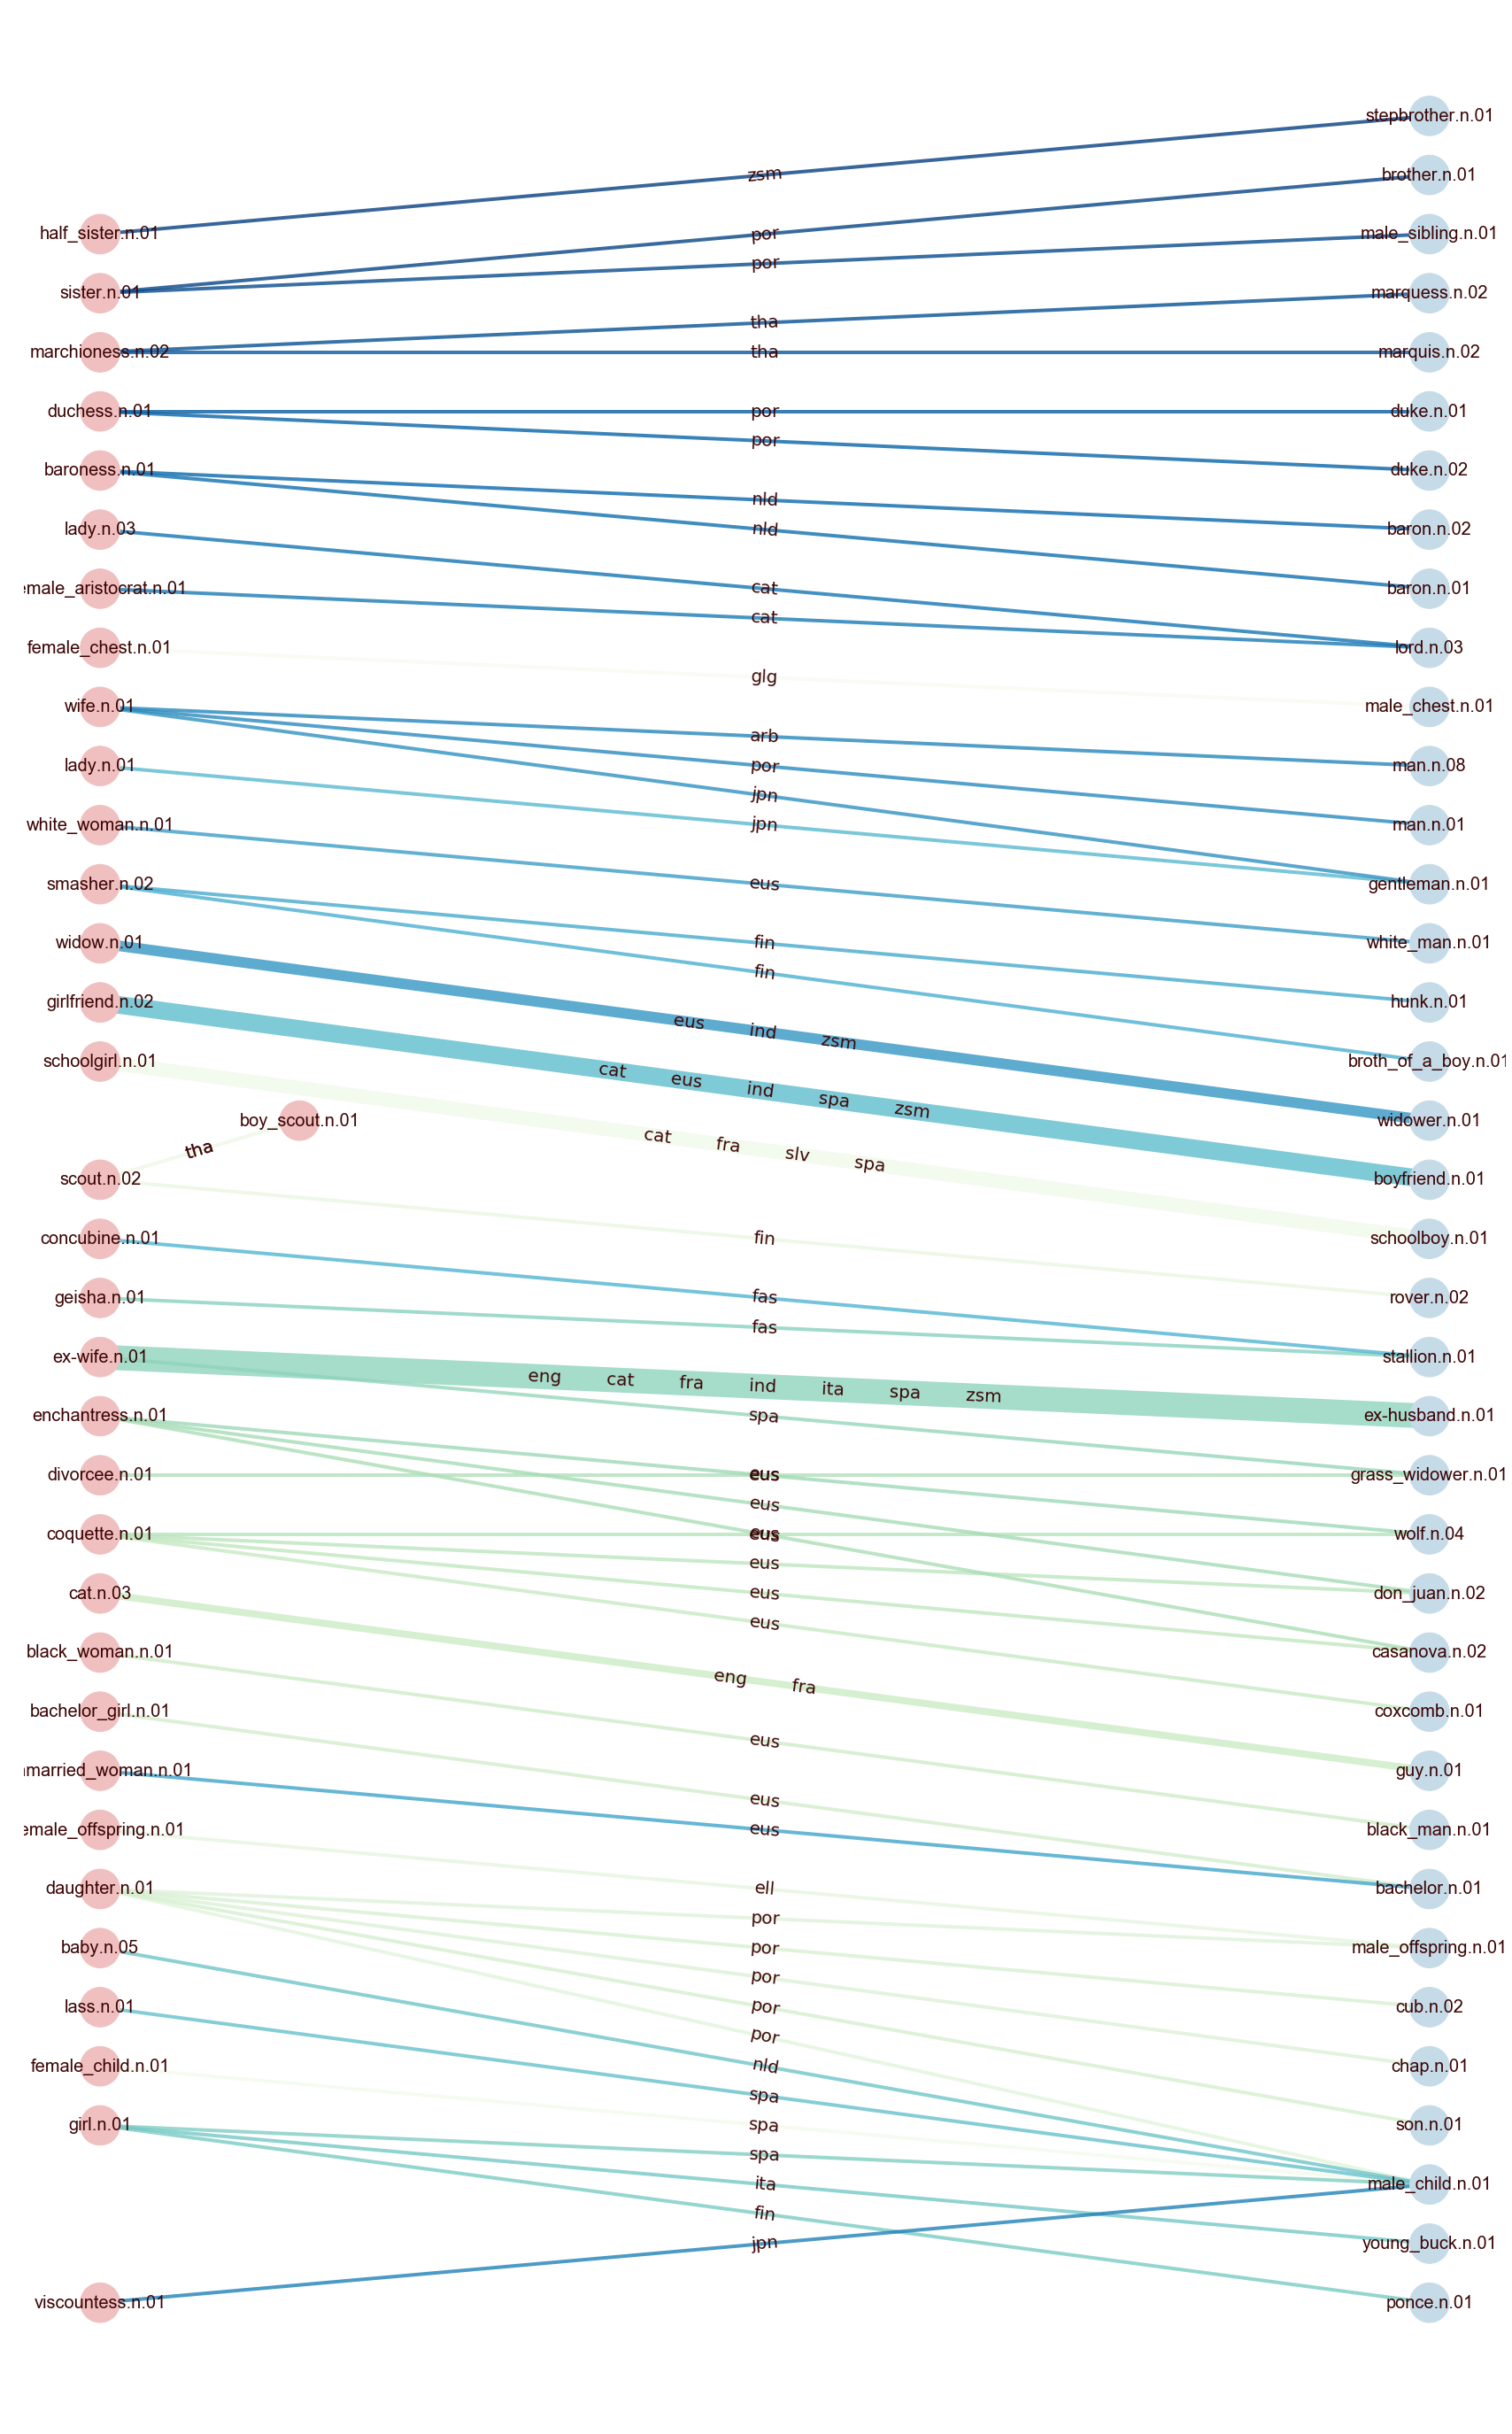

In [178]:
weights = [G[u][v]['weight']*4 for u,v in G.edges()]

plt.figure(figsize=(30,50))
nx.draw_networkx_nodes(G, pos, node_color=colors, node_size=2000) 
nx.draw_networkx_edges(G, pos, edge_color=range(len(G.edges())), width=weights, alpha=0.8, edge_cmap=plt.cm.GnBu)
nx.draw_networkx_edge_labels(G, pos, edge_labels=langs_att, font_color='#3C0505',
                             font_size=20, bbox=dict(alpha=0))
nx.draw_networkx_labels(G, pos, font_size=20, font_family='Arial', font_color='#3C0505')
plt.axis('off') 
plt.savefig('WordNetColexificationGender_0.png')

In [149]:
import re

In [179]:
for k, v in langs_att.items():
    print(k, len(re.split(r"\s+", v.strip())))

('female_chest.n.01', 'male_chest.n.01') 1
('female_child.n.01', 'male_child.n.01') 1
('schoolgirl.n.01', 'schoolboy.n.01') 4
('scout.n.02', 'boy_scout.n.01') 1
('boy_scout.n.01', 'scout.n.02') 1
('scout.n.02', 'rover.n.02') 1
('female_offspring.n.01', 'male_offspring.n.01') 1
('daughter.n.01', 'male_child.n.01') 1
('daughter.n.01', 'male_offspring.n.01') 1
('daughter.n.01', 'chap.n.01') 1
('daughter.n.01', 'cub.n.02') 1
('daughter.n.01', 'son.n.01') 1
('bachelor_girl.n.01', 'bachelor.n.01') 1
('black_woman.n.01', 'black_man.n.01') 1
('cat.n.03', 'guy.n.01') 2
('coquette.n.01', 'coxcomb.n.01') 1
('coquette.n.01', 'casanova.n.02') 1
('coquette.n.01', 'don_juan.n.02') 1
('coquette.n.01', 'wolf.n.04') 1
('divorcee.n.01', 'grass_widower.n.01') 1
('enchantress.n.01', 'casanova.n.02') 1
('enchantress.n.01', 'don_juan.n.02') 1
('enchantress.n.01', 'wolf.n.04') 1
('ex-wife.n.01', 'grass_widower.n.01') 1
('ex-wife.n.01', 'ex-husband.n.01') 7
('geisha.n.01', 'stallion.n.01') 1
('girl.n.01', 'mal

In [126]:
for synset in pos:
    pos[synset] = [int(pos[synset][0]),int(pos[synset][1])]

In [169]:
with open('wordnet_pos.json', 'w') as fp:
    json.dump(pos, fp)

In [119]:
for pair in synsets_colexified:
    print(pair['synset_f'].name(), pair['synset_f'].definition())
    print(pair['synset_m'].name(), pair['synset_m'].definition())
    for lang, lemmas in pair['colexified_lemmas'].items():
        print('\t', lang, ', '.join(lemmas))

female_chest.n.01 the chest of a woman
male_chest.n.01 the chest of a man
	 glg busto
female_child.n.01 a youthful female person
male_child.n.01 a youthful male person
	 spa joven
schoolgirl.n.01 a girl attending school
schoolboy.n.01 a boy attending school
	 cat escolar
	 fra écolier, élève
	 slv dijak
	 spa escolar
scout.n.02 a Boy Scout or Girl Scout
boy_scout.n.01 a boy who is a member of the Boy Scouts
	 tha ลูกเสือ
scout.n.02 a Boy Scout or Girl Scout
rover.n.02 an adult member of the Boy Scouts movement
	 fin partiolainen
boy_scout.n.01 a boy who is a member of the Boy Scouts
scout.n.02 a Boy Scout or Girl Scout
	 tha ลูกเสือ
female_offspring.n.01 a child who is female
male_offspring.n.01 a child who is male
	 ell παιδί
daughter.n.01 a female human offspring
chap.n.01 a boy or man
	 por menino
daughter.n.01 a female human offspring
male_child.n.01 a youthful male person
	 por criança, menino
daughter.n.01 a female human offspring
cub.n.02 a male child (a familiar term of address